# Deep Neural Network, DNN

In [2]:
import torch
import torchvision
import numpy as np

## Data loading

In [5]:
from torchvision import datasets
from torchvision import transforms

In [16]:
batch_size = 12

train_data = datasets.MNIST('./data/', train = True, download = True, transform = transforms.ToTensor())
test_data = datasets.MNIST('./data/', train = False, download = True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

## Model

In [10]:
from torch import nn

In [11]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28 # MNIST
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
        
    def forward(self, x):
        a1 = self.relu(self.fc1(x.view(-1, self.in_dim)))
        a2 = self.relu(self.fc2(a1))
        a3 = self.relu(self.fc3(a2))
        a4 = self.relu(self.fc4(a3))
        logit = self.fc5(a4)
        return logit

## Train

In [13]:
from torch import optim

In [17]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [18]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f' %
                 (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.222
[1,  4000] loss: 0.734
[2,  2000] loss: 0.314
[2,  4000] loss: 0.249
[3,  2000] loss: 0.164
[3,  4000] loss: 0.142
[4,  2000] loss: 0.111
[4,  4000] loss: 0.103
[5,  2000] loss: 0.079
[5,  4000] loss: 0.078
[6,  2000] loss: 0.058
[6,  4000] loss: 0.062
[7,  2000] loss: 0.047
[7,  4000] loss: 0.050
[8,  2000] loss: 0.038
[8,  4000] loss: 0.039
[9,  2000] loss: 0.030
[9,  4000] loss: 0.035
[10,  2000] loss: 0.020
[10,  4000] loss: 0.029
Finished Training


## Test

In [22]:
import matplotlib.pyplot as plt

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

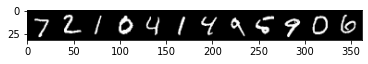

GroundTruth
   7   2   1   0   4   1   4   9   5   9   0   6
Prediction
   7   2   1   0   4   1   4   9   5   9   0   6


In [23]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = batch_size))
print('GroundTruth')
print(" " + ' '.join('%3s' % label.item() for label in labels))

outputs = model(images)
_, predicted = torch.max(outputs, 1)
print("Prediction")
print(" " + ' '.join('%3s' % label.item() for label in predicted))

In [24]:
# Accurancy

n_predict = 0
n_correct = 0

for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()
    
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

9791/10000
Accuracy: 0.979
